# Volatility

In [1]:
# Step 1: Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import time
import math

In [2]:
# Step 2: Read BTC dataset and apply transformation to day
btc = pd.read_csv('bpi.csv')
def str_to_time(elem):
    day = datetime.datetime.strptime(elem, '%Y-%m-%d')
    return day

btc['Date'] = btc['Date'].apply(str_to_time)
btc = btc.set_index('Date')

In [3]:
# Step 3: Open final dataset (reddit)

try:
    df = pd.read_csv('df_final.csv')
except:
    import zipfile
    with zipfile.ZipFile('df_final.zip', 'r') as zip_ref:
        zip_ref.extractall('')
    df = pd.read_csv('df_final.csv')

df['id'] = df['id'].astype(str)
df['timestamp'] = df['timestamp'].astype(int)
df['author'] = df['author'].astype(str)
df['score'] = df['score'].astype(int)
df['comments'] = df['comments'].astype(int)
df['title'] = df['title'].astype(str)
df['text'] = df['text'].astype(str)
df['Time'] = pd.to_datetime(df['Time'])
df['Day'] = pd.to_datetime(df['Day'])

# Making the new dataset

What should be included?
- Price of Bitcoin
- 30 Day Rolling Volatility
- Number of comments that day
- Change to the previous day
- Number of threads that day
- Change to the previous day

In [4]:
# Adding a few variables
agg_coms = df.groupby('Day').sum()['comments']
ch_agg_coms = [math.nan]
ch_agg_coms_pct = [math.nan]
for i in range(1,len(agg_coms)):
    ch_agg_coms.append(agg_coms.iloc[i]-agg_coms.iloc[i-1])
    ch_agg_coms_pct.append((agg_coms.iloc[i]/agg_coms.iloc[i-1])-1)

agg_threads = df.groupby('Day').count()['id']
ch_agg_threads = [math.nan]
ch_agg_threads_pct = [math.nan]
for i in range(1, len(agg_threads)):
    ch_agg_threads.append(agg_threads.iloc[i]-agg_threads.iloc[i-1])
    ch_agg_threads_pct.append((agg_threads.iloc[i]/agg_threads.iloc[i-1])-1)
    
ch_btc = [math.nan]
ch_btc_pct = [math.nan]
for i in range(1, len(btc['BPI'])):
    ch_btc.append(btc['BPI'].iloc[i]-btc['BPI'].iloc[i-1])
    ch_btc_pct.append((btc['BPI'].iloc[i]/btc['BPI'].iloc[i-1])-1)

In [5]:
# Calculating the volatility
vola = pd.DataFrame(ch_btc_pct).rolling(30).std()*np.sqrt(30)
vola.index = btc.index
vola

,0
Date,
2016-01-01,NaN
2016-01-02,NaN
2016-01-03,NaN
2016-01-04,NaN
2016-01-05,NaN
...,...
2020-12-27,0.201219
2020-12-28,0.200894
2020-12-29,0.200589


In [6]:
# getting the change in volatility
ch_vola = [math.nan]
for i in range(1, len(vola)):
    ch_vola.append((vola.iloc[i]-vola.iloc[i-1])[0])
    
ch_vola

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.00047882311212638085,
 0.00011353916972539624,
 -0.00016967815013330112,
 0.006454127813451949,
 3.9088228492467625e-05,
 -0.009258702040002509,
 -5.084024416401878e-06,
 3.7319786962419776e-05,
 0.00020910357310982564,
 0.0010170158514315464,
 -0.0019168893229812856,
 0.000629071792917657,
 0.001379450747148181,
 -0.06162534109679499,
 -0.01566565376366752,
 -0.00043596955198019205,
 0.00045702067149711034,
 -0.0014200104029722105,
 -0.03745959097115256,
 0.0032591334109299264,
 -0.02091900773978554,
 -1.1513439726079655e-05,
 0.0017576117451135465,
 -0.004170054774012499,
 0.00010266362492089565,
 0.001178196655662725,
 -0.008153943507809708,
 -0.00022597612076470652,
 -0.00023389393037551165,
 -0.00404071945506311,
 0.005001924818191131,
 0.000408634079612058,
 0.0035281592734247996,
 -0.008819422

In [7]:
# Creating data frame for training
ds = pd.DataFrame()
ds['BTC'] = btc['BPI']
ds['BTC_ch'] = ch_btc
ds['BTC_ch_p'] = ch_btc_pct
ds['BTC_vola'] = vola
ds['BTC_vola_ch'] = ch_vola

ds['Comments'] = agg_coms
ds['Comments_ch'] = ch_agg_coms
ds['Comments_ch_p'] = ch_agg_coms_pct

ds['Threads'] = agg_threads
ds['Threads_ch'] = ch_agg_threads
ds['Threads_ch_p'] = ch_agg_threads_pct

In [8]:
# Omitting the Year 2020 and getting the correlation
ds = ds[ds.index<'2020-01-01']
ds.corr()

,BTC,BTC_ch,BTC_ch_p,BTC_vola,BTC_vola_ch,Comments,Comments_ch,Comments_ch_p,Threads,Threads_ch,Threads_ch_p
BTC,1.000000,0.035846,0.010680,0.530053,-0.000126,0.474627,-0.011333,-0.013820,0.472211,-0.007384,-0.015159
BTC_ch,0.035846,1.000000,0.823555,0.008040,0.032405,0.025301,-0.073672,-0.054386,0.062442,0.059358,0.029633
BTC_ch_p,0.010680,0.823555,1.000000,0.017709,0.062440,0.029846,-0.056640,-0.050896,0.057963,0.044736,0.029862
BTC_vola,0.530053,0.008040,0.017709,1.000000,0.066148,0.502403,-0.022472,-0.019919,0.472748,-0.020641,-0.027128
BTC_vola_ch,-0.000126,0.032405,0.062440,0.066148,1.000000,0.168276,0.169178,0.193681,0.155418,0.165684,0.195060
Comments,0.474627,0.025301,0.029846,0.502403,0.168276,1.000000,0.243500,0.187701,0.968141,0.215249,0.155355
Comments_ch,-0.011333,-0.073672,-0.056640,-0.022472,0.169178,0.243500,1.000000,0.665728,0.173562,0.810389,0.473058
Comments_ch_p,-0.013820,-0.054386,-0.050896,-0.019919,0.193681,0.187701,0.665728,1.000000,0.105284,0.423426,0.626692
Threads,0.472211,0.062442,0.057963,0.472748,0.155418,0.968141,0.173562,0.105284,1.000000,0.235580,0.167229
Threads_ch,-0.007384,0.059358,0.044736,-0.020641,0.165684,0.215249,0.810389,0.423426,0.235580,1.000000,0.603423


In [9]:
# Importing additional modules
import seaborn as sns
import matplotlib
font = {
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

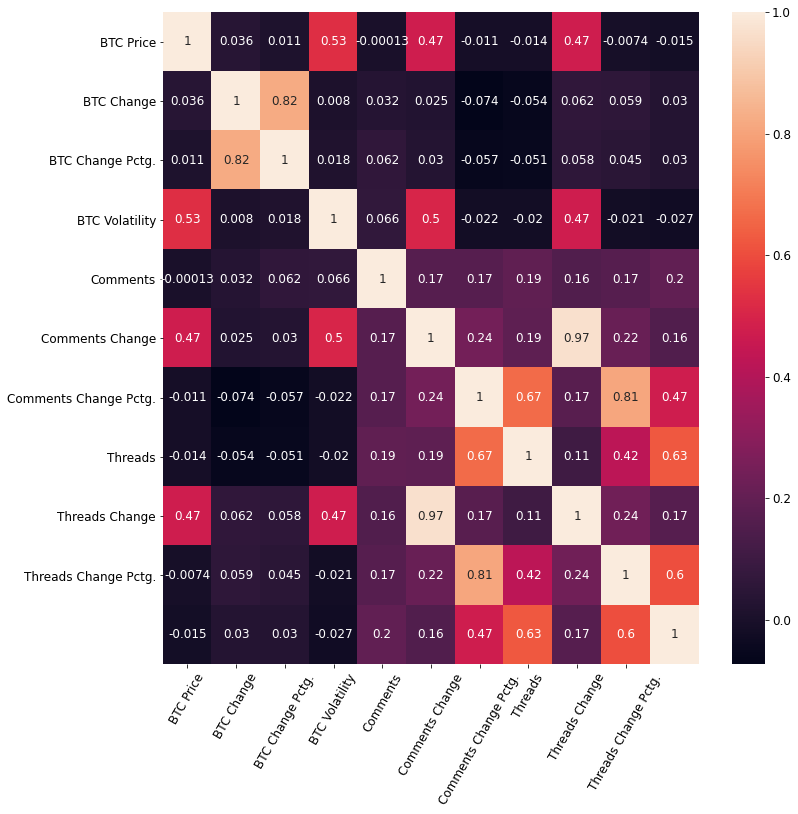

In [10]:
# Plotting the heatmap
ticklabels=['BTC Price', 'BTC Change','BTC Change Pctg.',
    'BTC Volatility', 'Comments', 'Comments Change', 
    'Comments Change Pctg.', 'Threads', 'Threads Change', 
    'Threads Change Pctg.']

plt.figure(figsize=(12,12))
hm = sns.heatmap(ds.corr(), annot=True,
    xticklabels = ticklabels,
    yticklabels = ticklabels)

hm.set_xticklabels(hm.get_xticklabels(), rotation=60);
hm.set_yticklabels(hm.get_yticklabels(), rotation=0);

Text(0, 0.5, 'Volatility')

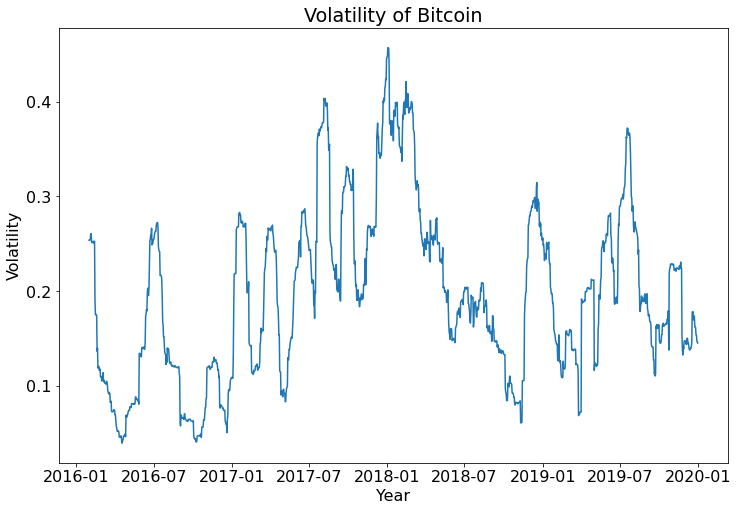

In [11]:
# Plotting the volatility of Bitcoin
font = {
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

plt.figure(figsize=(12,8))
plt.plot(ds['BTC_vola'])
plt.title('Volatility of Bitcoin')
plt.xlabel('Year')
plt.ylabel('Volatility')

In [12]:
# Making a new dataset
dd = pd.DataFrame(df.groupby('Day').sum())[['score', 'comments']]
dd = dd[dd.index < '2020-01-01']
dd

,score,comments
Day,,
2016-01-01,2616.0,1588.0
2016-01-02,2097.0,1625.0
2016-01-03,2197.0,1661.0
2016-01-04,2991.0,1690.0
2016-01-05,3140.0,2479.0
...,...,...
2019-12-27,140.0,1347.0
2019-12-28,163.0,1519.0
2019-12-29,118.0,1300.0


In [13]:
# Making yet another new dataset
day_df = pd.DataFrame(df.groupby('Day').count()['id'])
day_df = day_df.rename(columns={'id':'New Threads'})
day_df

,New Threads
Day,
2016-01-01,132
2016-01-02,160
2016-01-03,169
2016-01-04,203
2016-01-05,208
...,...
2020-12-27,488
2020-12-28,396
2020-12-29,429


# Model Building

In [15]:
%pip install statsmodels

  Using cached statsmodels-0.12.2-cp37-none-win_amd64.whl (9.3 MB)
  Using cached patsy-0.5.1-py2.py3-none-any.whl (231 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\jasper\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [16]:
# Importing statsmodel, the library we will be working with
import statsmodels.api as sm

In [17]:
# Creating the new dataset for the model building
md = ds
md['T1'] = range(md.shape[0])

def squaring(elem):
    elem = elem ** 2
    return elem

def cubing(elem):
    elem = elem ** 3
    return elem

md['T2'] = md['T1'].apply(squaring)
md['T3'] = md['T1'].apply(cubing)
md_cut = md[md.index<'2020-01-01']
md_cut = sm.add_constant(md_cut)
md_cut = md_cut.iloc[31:]
md_cut

,const,BTC,BTC_ch,BTC_ch_p,BTC_vola,BTC_vola_ch,Comments,Comments_ch,Comments_ch_p,Threads,Threads_ch,Threads_ch_p,T1,T2,T3
Date,,,,,,,,,,,,,,,
2016-02-01,1.0,371.2480,4.1130,0.011203,0.254344,0.000479,2280.0,447.0,0.243863,218,69.0,0.463087,31,961,29791
2016-02-02,1.0,372.8770,1.6290,0.004388,0.254458,0.000114,1525.0,-755.0,-0.331140,160,-58.0,-0.266055,32,1024,32768
2016-02-03,1.0,368.9330,-3.9440,-0.010577,0.254288,-0.000170,2376.0,851.0,0.558033,202,42.0,0.262500,33,1089,35937
2016-02-04,1.0,388.6120,19.6790,0.053340,0.260742,0.006454,1476.0,-900.0,-0.378788,185,-17.0,-0.084158,34,1156,39304
2016-02-05,1.0,385.3380,-3.2740,-0.008425,0.260781,0.000039,1901.0,425.0,0.287940,181,-4.0,-0.021622,35,1225,42875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,1.0,7259.6700,53.8667,0.007475,0.153853,-0.007940,1347.0,-1128.0,-0.455758,138,-6.0,-0.041667,1456,2119936,3086626816
2019-12-28,1.0,7313.6933,54.0233,0.007442,0.153634,-0.000220,1519.0,172.0,0.127691,159,21.0,0.152174,1457,2122849,3092990993
2019-12-29,1.0,7397.5350,83.8417,0.011464,0.147227,-0.006406,1300.0,-219.0,-0.144174,117,-42.0,-0.264151,1458,2125764,3099363912


In [18]:
# First Model
ols1 = sm.OLS(md_cut['Threads'], md_cut[['const', 'BTC']]).fit()
print("Parameters are:\n" + str(ols1.params))
print("\nAIC is euqal to: " + str(ols1.aic))
print("R-Squared is equal to: " + str(ols1.rsquared))
print("\nPvalues are equal to:\n" + str(ols1.pvalues))

Parameters are:
const    141.796203
BTC        0.039347
dtype: float64

AIC is euqal to: 20257.15012066788
R-Squared is equal to: 0.22154086332784817

Pvalues are equal to:
const    2.227325e-29
BTC      9.842105e-80
dtype: float64


In [19]:
# Second Model
ols2 = sm.OLS(md_cut['Threads'], md_cut[['const', 'BTC', 'T1']]).fit()
print("Parameters are:\n" + str(ols2.params))
print("\nAIC is euqal to: " + str(ols2.aic))
print("R-Squared is equal to: " + str(ols2.rsquared))
print("\nPvalues are equal to:\n" + str(ols2.pvalues))

Parameters are:
const    323.829676
BTC        0.075163
T1        -0.482487
dtype: float64

AIC is euqal to: 19861.36729015541
R-Squared is equal to: 0.41057546970961456

Pvalues are equal to:
const    1.212317e-104
BTC      7.092128e-166
T1        2.721598e-88
dtype: float64


In [20]:
# Third Model
ols3 = sm.OLS(md_cut['Threads'], md_cut[['const', 'BTC', 'T1', 'T2']]).fit()
print("Parameters are:\n" + str(ols3.params))
print("\nAIC is euqal to: " + str(ols3.aic))
print("R-Squared is equal to: " + str(ols3.rsquared))
print("\nPvalues are equal to:\n" + str(ols3.pvalues))

Parameters are:
const    92.217551
BTC       0.065359
T1        0.479193
T2       -0.000601
dtype: float64

AIC is euqal to: 19677.269170233852
R-Squared is equal to: 0.48250071519165194

Pvalues are equal to:
const     1.062291e-05
BTC      3.894008e-137
T1        2.964010e-11
T2        3.032214e-42
dtype: float64


In [21]:
# Fourth Model
ols4 = sm.OLS(md_cut['Threads'], md_cut[['const', 'BTC', 'T1', 'T2', 'T3']]).fit()
print("Parameters are:\n" + str(ols4.params))
print("\nAIC is euqal to: " + str(ols4.aic))
print("R-Squared is equal to: " + str(ols4.rsquared))
print("\nPvalues are equal to:\n" + str(ols4.pvalues))

Parameters are:
const   -1.410489e+01
BTC      6.594809e-02
T1       1.258671e+00
T2      -1.893716e-03
T3       5.792829e-07
dtype: float64

AIC is euqal to: 19652.48588376028
R-Squared is equal to: 0.4921030502564242

Pvalues are equal to:
const     6.280271e-01
BTC      7.754610e-141
T1        6.200899e-14
T2        1.133387e-13
T3        2.400578e-07
dtype: float64


In [22]:
# Fifth Model
ols5 = sm.OLS(md_cut['Threads'], md_cut[['const', 'BTC', 'T1', 'T2', 'T3', 'BTC_vola']]).fit()
print("Parameters are:\n" + str(ols5.params))
print("\nAIC is euqal to: " + str(ols5.aic))
print("R-Squared is equal to: " + str(ols5.rsquared))
print("\nPvalues are equal to:\n" + str(ols5.pvalues))

Parameters are:
const      -3.631762e+01
BTC         6.116816e-02
T1          1.123646e+00
T2         -1.723119e-03
T3          5.266372e-07
BTC_vola    3.276479e+02
dtype: float64

AIC is euqal to: 19640.385868050336
R-Squared is equal to: 0.4970863822184495

Pvalues are equal to:
const        2.195773e-01
BTC         4.737196e-101
T1           4.375567e-11
T2           2.222378e-11
T3           2.810315e-06
BTC_vola     1.793507e-04
dtype: float64


In [23]:
# Interaction effects 
md_cut['BTCT1'] = md_cut['BTC'] * md_cut['T1'] 
md_cut['BTCT2'] = md_cut['BTC'] * md_cut['T2'] 
md_cut['BTCT3'] = md_cut['BTC'] * md_cut['T3'] 

In [24]:
# Sixth Model
ols6 = sm.OLS(md_cut['Threads'], md_cut[['const', 'BTC', 'T1', 'T2', 'T3', 'BTC_vola',
                                        'BTCT1']]).fit()
print("Parameters are:\n" + str(ols6.params))
print("\nAIC is euqal to: " + str(ols6.aic))
print("R-Squared is equal to: " + str(ols6.rsquared))
print("\nPvalues are equal to:\n" + str(ols6.pvalues))

Parameters are:
const       -11.827413
BTC           0.207588
T1            0.739349
T2           -0.001739
T3            0.000001
BTC_vola    159.807408
BTCT1        -0.000173
dtype: float64

AIC is euqal to: 19375.656427336857
R-Squared is equal to: 0.5826628798035012

Pvalues are equal to:
const        6.612320e-01
BTC         4.130237e-102
T1           2.283670e-06
T2           1.379920e-13
T3           3.993145e-22
BTC_vola     4.619701e-02
BTCT1        1.181183e-59
dtype: float64


In [25]:
# Seventh model
ols7 = sm.OLS(md_cut['Threads'], md_cut[['const', 'BTC', 'T1', 'T2', 'T3', 'BTC_vola',
                                        'BTCT1', 'BTCT2']]).fit()
print("Parameters are:\n" + str(ols7.params))
print("\nAIC is euqal to: " + str(ols7.aic))
print("R-Squared is equal to: " + str(ols7.rsquared))
print("\nPvalues are equal to:\n" + str(ols7.pvalues))

Parameters are:
const       1.634819e+01
BTC         8.911074e-01
T1         -1.718963e+00
T2          4.586536e-03
T3         -2.503240e-06
BTC_vola   -3.108249e+02
BTCT1      -1.692811e-03
BTCT2       7.899770e-07
dtype: float64

AIC is euqal to: 19134.914278602722
R-Squared is equal to: 0.6478192343556664

Pvalues are equal to:
const       5.108635e-01
BTC         8.112484e-84
T1          3.712295e-16
T2          4.344825e-24
T3          1.236675e-24
BTC_vola    8.943036e-05
BTCT1       2.999044e-65
BTCT2       2.047121e-54
dtype: float64


In [26]:
# Eighth model
ols8 = sm.OLS(md_cut['Threads'], md_cut[['const', 'BTC', 'T1', 'T2', 'T3', 'BTC_vola',
                                        'BTCT1', 'BTCT2', 'BTCT3']]).fit()
print("Parameters are:\n" + str(ols8.params))
print("\nAIC is euqal to: " + str(ols8.aic))
print("R-Squared is equal to: " + str(ols8.rsquared))
print("\nPvalues are equal to:\n" + str(ols8.pvalues))

Parameters are:
const      -2.980035e+02
BTC         1.511177e+00
T1         -4.749264e-01
T2          2.348719e-03
T3         -1.297615e-06
BTC_vola   -3.474239e+02
BTCT1      -3.698809e-03
BTCT2       2.961213e-06
BTCT3      -7.704685e-10
dtype: float64

AIC is euqal to: 19069.689294231084
R-Squared is equal to: 0.6639922907276483

Pvalues are equal to:
const       5.548903e-11
BTC         8.168343e-63
T1          6.093260e-02
T2          4.884490e-06
T3          2.820103e-06
BTC_vola    7.804411e-06
BTCT1       3.299719e-43
BTCT2       1.661482e-27
BTCT3       3.037958e-16
dtype: float64


# Comments on Threads

In [27]:
# Ninth model
ols9 = sm.OLS(md_cut['Comments'], md_cut[['const', 'Threads']]).fit()
print("Parameters are:\n" + str(ols9.params))
print("\nAIC is euqal to: " + str(ols9.aic))
print("R-Squared is equal to: " + str(ols9.rsquared))
print("\nPvalues are equal to:\n" + str(ols9.pvalues))

Parameters are:
const      100.152497
Threads     10.137527
dtype: float64

AIC is euqal to: 23371.489419530375
R-Squared is equal to: 0.9373249904262523

Pvalues are equal to:
const      0.002124
Threads    0.000000
dtype: float64


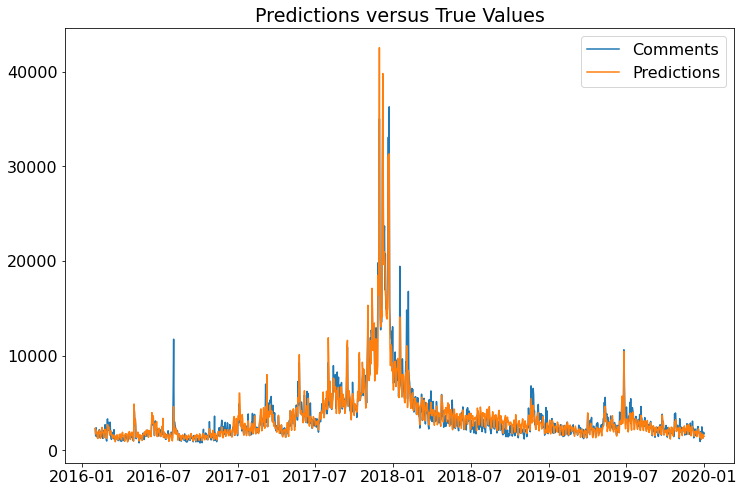

In [28]:
# Predicting based on the model, and plotting
predictions = ols9.predict(md_cut[['const', 'Threads']])

a = pd.DataFrame(md_cut['Comments'])
a['preds'] = predictions

plt.figure(figsize=(12,8))
plt.plot(a[['Comments', 'preds']])
plt.title('Predictions versus True Values')
plt.legend(['Comments', 'Predictions'])

In [29]:
# Getting the mean squared and mean absolute error
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(np.sqrt(mean_squared_error(a['Comments'], a['preds'])))
print(mean_absolute_error(a['Comments'], a['preds']))

855.3513436589661
539.344468645825


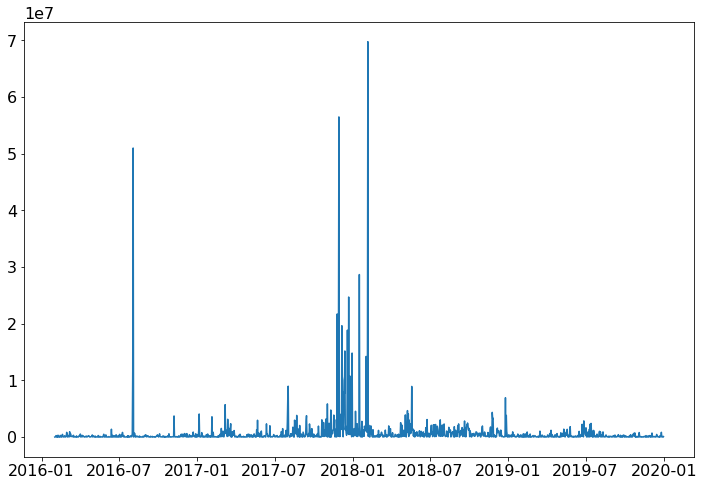

In [31]:
# Plotting the squared error over time
plt.figure(figsize=(12,8))
plt.plot(pd.DataFrame((a['Comments']-a['preds'])**2))